# EDA and Modeling #

After running the Zipcode grouped baseline models(R-squared of .62), we ran these following models with cluster based groups:

- Simple Linear Regression
- Lasso Regression
- Ridge Regression
- Random Forest 

In Linear Regression, we aim to minimize sum of squared errors by finding the line of best fit.

Ridge and Lasso Regression penalizes overfitting (too many variables) and reduces the effects (sometimes to 0 with Lasso) of some unnecessary variables.

In Random Forest, we use an ensemble model that uses Boot Strap Aggregation (randomly sampling the data's features/variables and replacing to avoid duplication). Random Forest model takes a group of trees that pick a sample of the variables at random. It is a tree based method that seeks to gain purity (classifying a group all from the same class, as much as possible), while reducing the variance (overfitting) that Decision Trees (another tree based method but without bootstrap aggregation).

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [2]:
yelp_df_dummies = pd.read_csv('./data/yelp_df_dummies_150.csv', index_col = 0)
property_df = pd.read_csv('./data/property_final_df_labeled_cleaned_150.csv', index_col = 0)

In [3]:
yelp_df_dummies.head()

,name,id,category,zip,latitude,longitude,labels_km,centroid_latitude,centroid_longitude,distance_centroid,...,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0,price_1.0,price_2.0,price_3.0,price_4.0
0,The Crawfish Co,9fEG4fIAc1DgrghJ2Bo2Vw,cajun,91342,34.3103,-118.429,48,34.306431,-118.435662,0.007704,...,0,0,0,0,1,0,0,1,0,0
1,Truman House Tavern,fe7WfjLwWsfFdvuJ2lhDxg,gastropubs,91340,34.2819,-118.440,83,34.283499,-118.442816,0.003238,...,0,0,0,0,1,0,0,1,0,0
2,Ranch Side Cafe,fzLtFDsHZSuDC36Tlw_3DQ,tradamerican,91342,34.2763,-118.379,25,34.277959,-118.410547,0.031590,...,0,0,0,1,0,0,0,1,0,0
3,Hide Away Cafe Mexican Grill,CjBiw0DusS7ymVZcq8BTeA,mexican,91342,34.2821,-118.373,25,34.277959,-118.410547,0.037774,...,0,0,0,0,1,0,1,0,0,0
4,Villa Terraza,jx-Ptpw7tNvLPnP97N6HBQ,italian,91040,34.2531,-118.346,35,34.259617,-118.314914,0.031762,...,0,0,0,0,1,0,0,1,0,0


In [4]:
property_df.shape

(103, 68)

Creating variables and using Train Test Split to train our models and test our models on unseen held out data. We will stick with the default 75% training data and 25% test data (to check if our model can perform on new data).

In [5]:
X = property_df.drop(columns='value')
y = property_df['value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

We are scaling data because Centroid Distance is a different unit of measure than feature counts of dummied variables

In [7]:
lr = LinearRegression()
ss = StandardScaler()

In [8]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

C:\Users\seung\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\seung\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Fitting Simple Linear Regression

In [9]:
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
lr.score(X_train_sc, y_train)

0.9748325710188855

In [11]:
lr.score(X_test_sc, y_test)

-1.5107520071198877

### Fitting Ridge Regression

In [12]:
ridge = RidgeCV()

In [13]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [14]:
ridge.score(X_train_sc, y_train)

0.925421188046642

In [15]:
ridge.score(X_test_sc, y_test)

0.6579736968727441

### Fitting Lasso Regression

In [16]:
ls = LassoCV()

In [17]:
ls.fit(X_train_sc, y_train)

C:\Users\seung\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\seung\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\seung\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [18]:
ls.score(X_train_sc, y_train)

0.843997539928412

In [19]:
ls.score(X_test_sc, y_test)

0.5640761715419496

### Fitting Random Forest

In [172]:
rf = RandomForestRegressor(random_state=42, min_samples_split=15, n_estimators=100)

In [173]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [174]:
rf.score(X_train, y_train)

0.8113848649540466

In [175]:
rf.score(X_test, y_test)

0.5836770699578875

## Production Model

**Production Model will be Cluster Grouped Ridge Model**

Since the R-squared score of 0.65 was the higher than our baseline, our Production Model will be Ridge.

The RMSE (or residual) was $208,357

The Ridge Model was still overfit but all of our models were. That was attributed to having 103 samples(aggregate groups) vs 68 features.

We are examining of Beta Weights to see the effects of features on Home Values.

In [28]:
beta_0 = ridge.intercept_

ridge.coef_

betas = pd.DataFrame(ridge.coef_, index=X.columns)

betas.rename(columns={0: 'betas'}, inplace=True)

betas['abs_betas'] = betas['betas'].abs()

betas.head(10)

,betas,abs_betas
distance_centroid,53856.386273,53856.386273
price_1.0,-26266.564280,26266.564280
price_2.0,23437.257461,23437.257461
price_3.0,32004.534261,32004.534261
price_4.0,1417.061148,1417.061148
rating_0.0,6229.725084,6229.725084
rating_1.0,-4229.155046,4229.155046
rating_1.5,6603.545671,6603.545671
rating_2.0,-27203.473288,27203.473288
rating_2.5,-23364.529824,23364.529824


These are the highest Beta Weights that effect Home values (per a 1 standard deviation move)

In [29]:
betas.sort_values('abs_betas', ascending=False)['betas'][:15]

type_italian          81115.772399
type_cafes            68084.745388
type_newamerican      63953.364851
type_indpak           62225.673536
type_salad           -54518.522881
distance_centroid     53856.386273
rating_5.0           -51487.509919
type_cocktailbars    -45585.331486
type_thai             45577.280018
type_seafood         -43593.318083
type_japanese        -40655.852025
type_hotdogs         -39802.586895
type_juicebars        37739.536070
type_burgers         -35803.174816
type_streetvendors   -35495.540049
Name: betas, dtype: float64

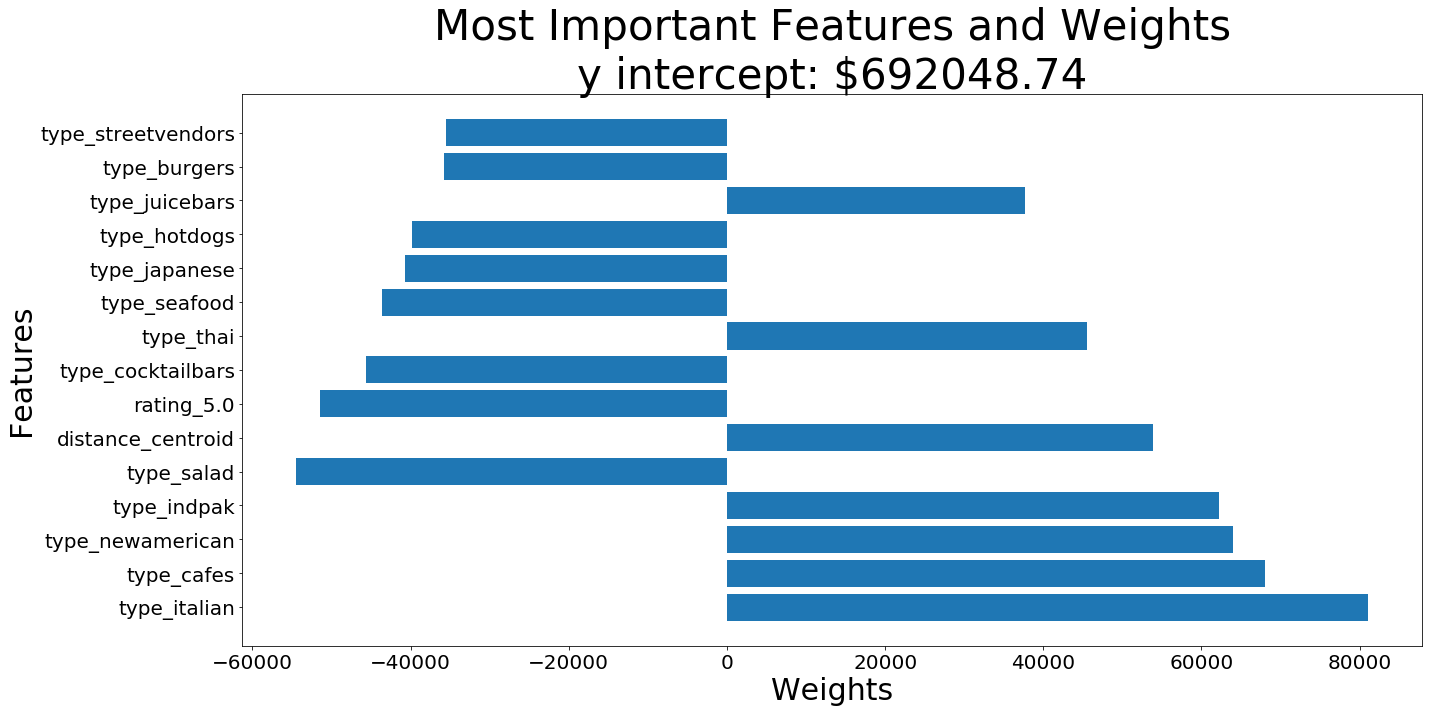

In [30]:
plt.figure(figsize=(20,10))
plt.barh(betas.sort_values('abs_betas', ascending=False)['betas'][:15].index,
         betas.sort_values('abs_betas', ascending=False)['betas'][:15])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Weights', fontsize=30)
plt.ylabel('Features', fontsize=30)
plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0:0.02f}', fontsize=42)
plt.tight_layout()

In [31]:
ridge_predict = ridge.predict(X_test_sc)

In [32]:
mean_squared_error(y_test, ridge_predict)

43412731789.106186

In [33]:
np.sqrt(mean_squared_error(y_test, ridge_predict))

208357.22159096427

### Model Obsevation

- Our model performs reasonably on aggregate home groups that have lower average prices. 

- On more expensive homes, the model performs poorly compared to lower priced clusters


This is expected because the more expensive home clusters did not have as many observed restaurant in its group. We need to find more restaurants in those areas if possible.

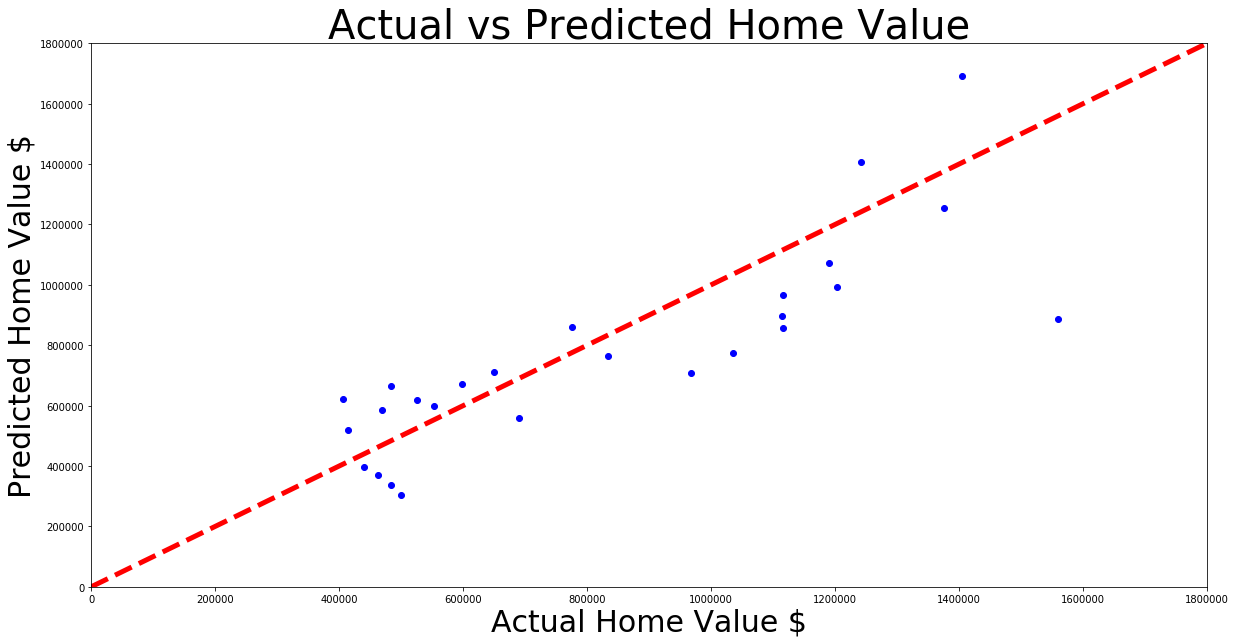

In [34]:
plt.figure(figsize=(20,10))
x_max = y_test.max()
y_max = ridge_predict.max()
plt.scatter(y_test, ridge_predict, c='blue')
plt.title('Actual vs Predicted Home Value', fontsize=40)
plt.plot([0, 1_800_000], [0, 1_800_000], lw=5, ls='--',c='red')
plt.xlabel('Actual Home Value $', fontsize=30)
plt.ylabel('Predicted Home Value $', fontsize=30)
plt.xlim([0, 1_800_000])
plt.ylim([0, 1_800_000]);

### Statistical Significance

Examining whether or not our features are statistically significant (with a P-Value of less than Alpha, or 0.05).

In [45]:
sm_index = sm.OLS(y, X).fit()

In [90]:
stats_index = sm_index.params

In [91]:
sm_model = sm.OLS(y, X).fit()

In [92]:
sm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
===========================================================================================
Model:                      OLS                      Adj. R-squared:             0.945     
Dependent Variable:         value                    AIC:                        2824.1834 
Date:                       2019-04-26 09:51         BIC:                        2995.4408 
No. Observations:           103                      Log-Likelihood:             -1347.1   
Df Model:                   65                       F-statistic:                28.08     
Df Residuals:               38                       Prob (F-statistic):         1.58e-19  
R-squared:                  0.980                    Scale:                      3.6347e+10
-------------------------------------------------------------------------------------------
                          Coef.       Std.Err.      t    P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------------------
distance_centroid     43328956.9138 4722428.2903  9.1751 0.0000 33768900.6404 52889013.1872
price_1.0                -6125.4884   19125.8265 -0.3203 0.7505   -44843.6999    32592.7230
price_2.0                 -508.2784   19207.8695 -0.0265 0.9790   -39392.5772    38376.0205
price_3.0                -8730.5351   19832.9030 -0.4402 0.6623   -48880.1481    31419.0780
price_4.0               -10483.6298   18911.1486 -0.5544 0.5826   -48767.2486    27799.9891
rating_0.0              -41163.7369  260042.8797 -0.1583 0.8751  -567593.0250   485265.5513
rating_1.0                2555.6724   35224.8604  0.0726 0.9425   -68753.3294    73864.6743
rating_1.5                1495.8891   22919.8098  0.0653 0.9483   -44902.8402    47894.6184
rating_2.0               -1869.1876   22988.9873 -0.0813 0.9356   -48407.9594    44669.5842
rating_2.5                -311.6920   21185.0050 -0.0147 0.9883   -43198.4924    42575.1085
rating_3.0               -4349.8064   20622.1894 -0.2109 0.8341   -46097.2463    37397.6335
rating_3.5                4569.4633   19238.0176  0.2375 0.8135   -34375.8672    43514.7938
rating_4.0                3195.3797   22234.1744  0.1437 0.8865   -41815.3532    48206.1126
rating_4.5                1820.8320   20020.3830  0.0909 0.9280   -38708.3145    42349.9785
rating_5.0                8209.2546   20837.6213  0.3940 0.6958   -33974.3044    50392.8137
type_aa_other             7968.4846    4047.9598  1.9685 0.0563     -226.1816    16163.1508
type_asianfusion         73536.0199   30577.2079  2.4049 0.0212    11635.6987   135436.3412
type_bakeries             9842.9958   11480.8885  0.8573 0.3966   -13398.8478    33084.8395
type_bars                -2212.9735   14930.5523 -0.1482 0.8830   -32438.2965    28012.3494
type_bbq                 15995.7975   18333.6579  0.8725 0.3884   -21118.7525    53110.3475
type_breakfast_brunch   -10621.9096   11446.0446 -0.9280 0.3593   -33793.2156    12549.3964
type_burgers             -2927.0093    7860.5895 -0.3724 0.7117   -18839.9409    12985.9223
type_cafes                 167.7923   14694.0656  0.0114 0.9909   -29578.7884    29914.3731
type_chicken_wings      -17941.4693   15248.4807 -1.1766 0.2467   -48810.4047    12927.4661
type_chinese             -9404.4000    7880.5543 -1.1934 0.2401   -25357.7481     6548.9481
type_cocktailbars       -32875.1637   25089.6930 -1.3103 0.1980   -83666.5918    17916.2644
type_coffee                488.3545    8848.6858  0.0552 0.9563   -17424.8734    18401.5825
type_convenience         19235.2608   20759.5341  0.9266 0.3600   -22790.2189    61260.7406
type_delis               34099.0729   15417.2939  2.2117 0.0331     2888.3932    65309.7526
type_desserts           -41242.6198   15765.3793 -2.6160 0.0127   -73157.9617    -9327.2778
type_diners             -38273.5849   20336.2007 -1.8820 0.0675   -79442.0709     2894.9012
type_divebars            

In [98]:
stats_value = sm_model.params

In [99]:
pvals = sm_model.pvalues

In [100]:
stats_df = pd.DataFrame(stats_index)

In [105]:
stats_df[0]=stats_value.values
stats_df['pvals'] = pvals.values

In [128]:
stats_df['pvals'][stats_df['pvals'] <= 0.05].round(6)

distance_centroid    0.000000
type_asianfusion     0.021153
type_delis           0.033072
type_desserts        0.012692
type_french          0.012617
type_icecream        0.014831
type_italian         0.015785
type_juicebars       0.031767
type_ramen           0.031192
type_salvadoran      0.042725
Name: pvals, dtype: float64

In [116]:
import matplotlib.pyplot as plt

**Most of our features were not statstically significant.**

Distance from the Centroid and Italian Restaurants were the only statistically signifcant features of our top 15 beta weights.

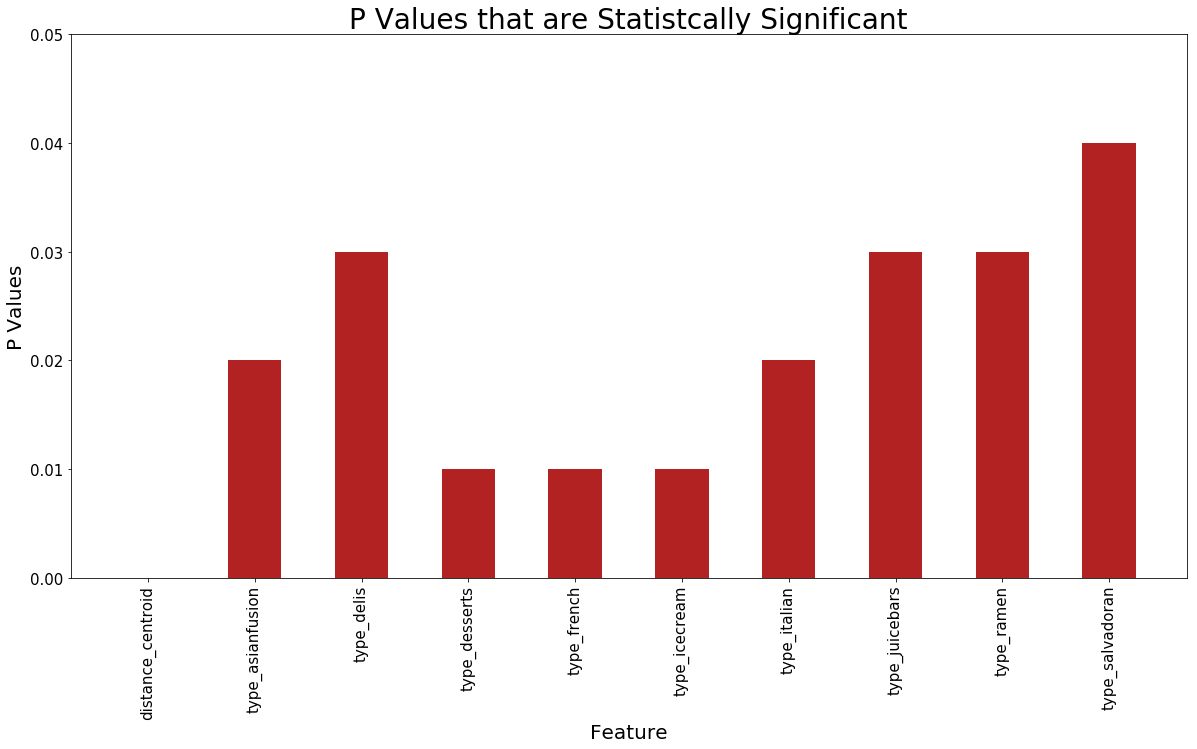

In [130]:
plt.figure(figsize =(20,10))
bar_width = 0.5
ind = stats_df['pvals'][stats_df['pvals'] <= 0.05].round(2).index
plt.bar(ind, stats_df['pvals'][stats_df['pvals'] <= 0.05].round(2), bar_width, color='firebrick', align='center')
plt.tick_params(axis='x', labelsize=15, labelrotation=90)
plt.tick_params(axis='y', labelsize=15, labelrotation=0)

plt.title('P Values that are Statistcally Significant', fontsize=28)
plt.ylabel('P Values', fontsize=20)
plt.xlabel('Feature', fontsize=20)
plt.ylim(0, 0.05);